In [1]:
import sys
sys.path.append("..")
from MSOModelModule.fancyPlot import *
from matplotlib import pyplot as plt
import gzip, json
import numpy as np

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Chapter 4 - Results

This notebook reproduces all graphs presented in chapter 4 of the thesis. Note that, to reduce the file size, we have included a reduced version of the data in this repository. Please email **lw1115 [at] ic.ac.uk** if you would like to have the full data set (including e.g. original spike trains and all weights over time). 

Most simulations of 50 neurons took approximatel 40 hours to run for 1000 s (20000000 timesteps) of simulations. 

## Figure 4.1

Before and after learning delay distributions

	Allocating data...
Initialisation succeeded


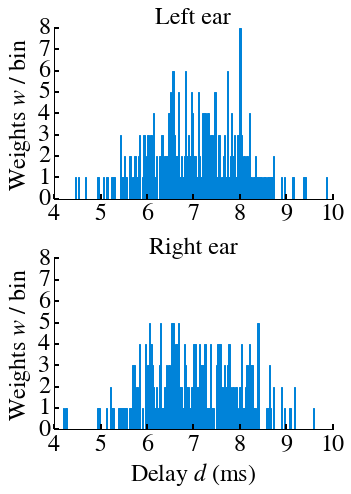

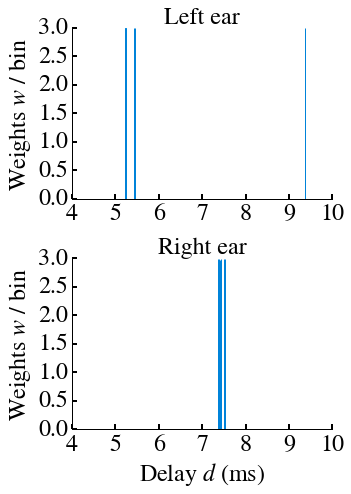

	Allocating data...
Initialisation succeeded


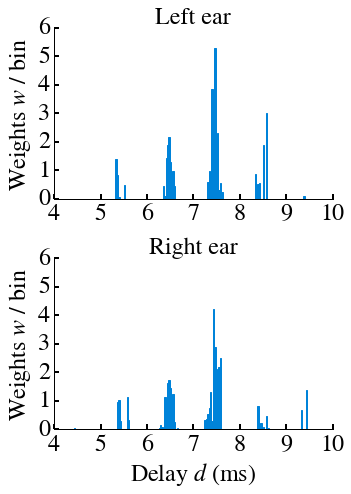

In [2]:
colors = basiccolors()

paths = ['../../data/13-47-26', '../../data/14-28-20']

t = 0
plotDelays(paths[0], 0, 0)
plt.tight_layout()
plt.savefig('figures/chapter4/before_delays.pdf')

t = 100000000
plotDelays(paths[0], t, 0)
plt.tight_layout()
plt.savefig('figures/chapter4/t4_after_delays.pdf')
plt.show()

t = 100000000
plotDelays(paths[1], t, 0)
plt.tight_layout()
plt.savefig('figures/chapter4/t1_after_delays.pdf')
plt.show()


## Figure 4.2

Weight development over time ITD curves (VS and ITD) after training. Note that we use precomputed values for faster presentation. You can disable this by putting "precomputed" to False, but this will make the image rendering much slower, and you require the full data set rather than the reduced version. 

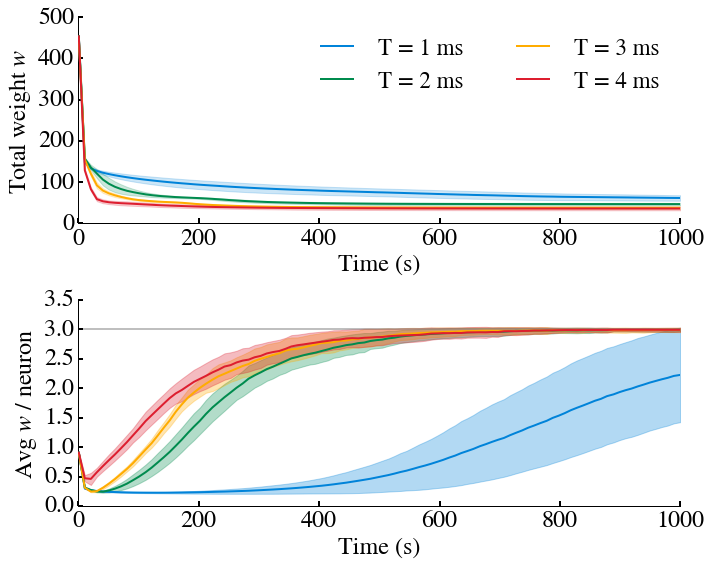

In [3]:
ts = np.linspace(200000, 200000000, 100)
paths = ['../../data/14-28-20', '../../data/13-53-25', 
         '../../data/21-51-31', '../../data/21-52-52_2']
colors = ['#0083d9', '#008b4e', '#ffac00', '#DD1E2F', '#192823']        
labels = ['T = 1 ms', 'T = 2 ms', 'T = 3 ms', 'T = 4 ms', 'No learning']
plotWeightEvolvement(paths, labels, ts, colors)
plt.savefig('figures/chapter4/weight_evolvement_various_frequencies.pdf')
plt.show()


Loading spikes for path 0... (this may take a while)


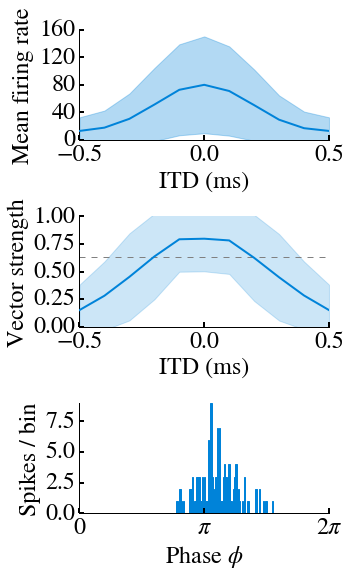

Loading spikes for path 0... (this may take a while)


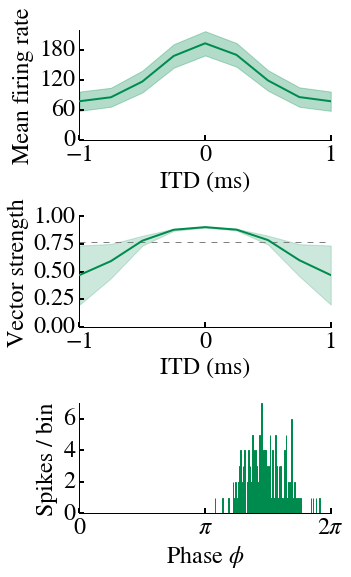

Loading spikes for path 0... (this may take a while)


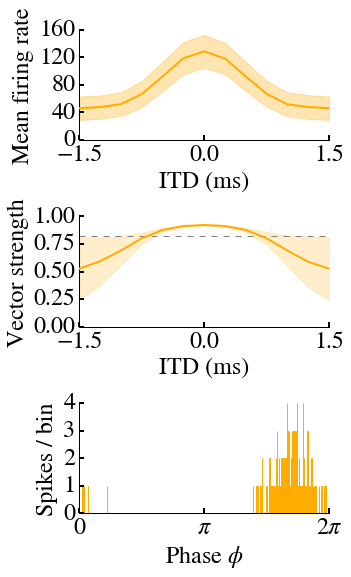

Loading spikes for path 0... (this may take a while)


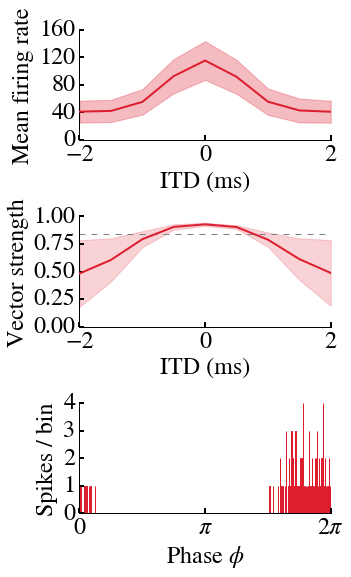

In [4]:
refVals = [0.63, 0.77, 0.82, 0.84]
paths = ['../../data/14-28-20', '../../data/13-53-25', 
         '../../data/21-51-31', '../../data/21-52-52']
colors = ['#0083d9', '#008b4e', '#ffac00', '#DD1E2F', '#192823']        
for i, path in enumerate(paths):
    plotITDCurves([path], [colors[i]], precomputed=True, includePhaseLock=True, refvals=[refVals[i]])
    plt.savefig('figures/chapter4/mfr_vs_variousfreq_{}.pdf'.format(i + 1))
    plt.show()

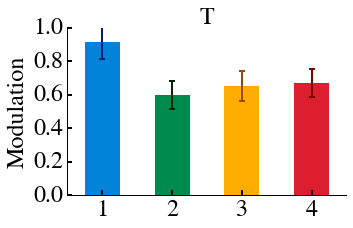

In [5]:
paths = ['../../data/14-28-20', '../../data/13-53-25', 
         '../../data/21-51-31', '../../data/21-52-52']
colors = ['#0083d9', '#008b4e', '#ffac00', '#DD1E2F', '#192823']        
labels = ['1', '2', '3', '4']
x = loadMeasurementsPerItd(paths, [0, 1, 2, 3], [0, 0, 0, 0])
modpre_per_itd, vspre_per_itd, mod_per_itd, vs_per_itd, nr_per_itd, itdoptions = x
plotModulationWithoutBefore(mod_per_itd, labels, 'Modulation', colors)
plt.title(r'T')
plt.savefig('figures/chapter4/modulation_various_frequencies.pdf')
plt.show()

## Figure 4.3

Weight evolvement and VS/MFR curves for different A+ and A- values

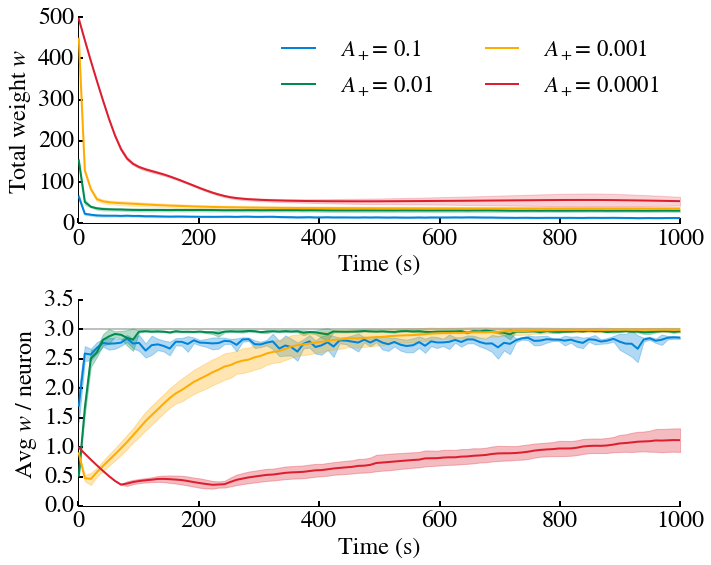

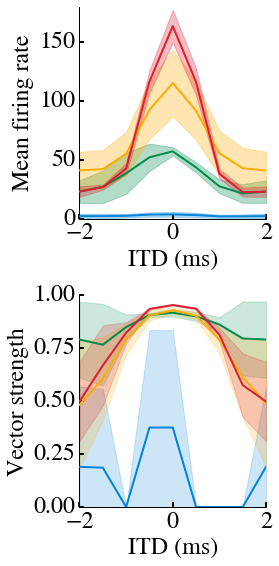

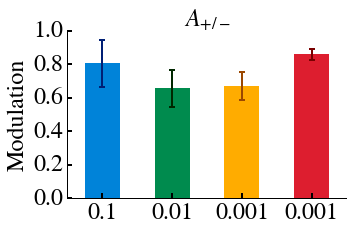

In [6]:
ts = np.linspace(200000, 200000000, 100)
paths = ['../../data/16-07-58', '../../data/16-07-43', 
         '../../data/21-52-52', '../../data/16-08-11']
colors = ['#0083d9', '#008b4e', '#ffac00', '#DD1E2F', '#192823']        
labels = ['$A_+$= 0.1', '$A_+$= 0.01', '$A_+$= 0.001', '$A_+$= 0.0001']

plotWeightEvolvement(paths, labels, ts, colors)
plt.savefig('figures/chapter4/weight_evolvement_variousA.pdf')
plt.show()

plotITDCurves(paths, colors, precomputed=True)
plt.savefig('figures/chapter4/mfr_vs_variousA.pdf')
plt.show()

labels = ['0.1', '0.01', '0.001', '0.001']
x = loadMeasurementsPerItd(paths, [0, 1, 2, 3], [0, 0, 0, 0])
modpre_per_itd, vspre_per_itd, mod_per_itd, vs_per_itd, nr_per_itd, itdoptions = x
plotModulationWithoutBefore(mod_per_itd, labels, 'Modulation', colors)
plt.title(r'$A_{+/-}$')
plt.savefig('figures/chapter4/modulation_various_A.pdf')
plt.show()

## Figure 4.3

Weight evolvement and VS/MFR curves for different tau+ and tau- values

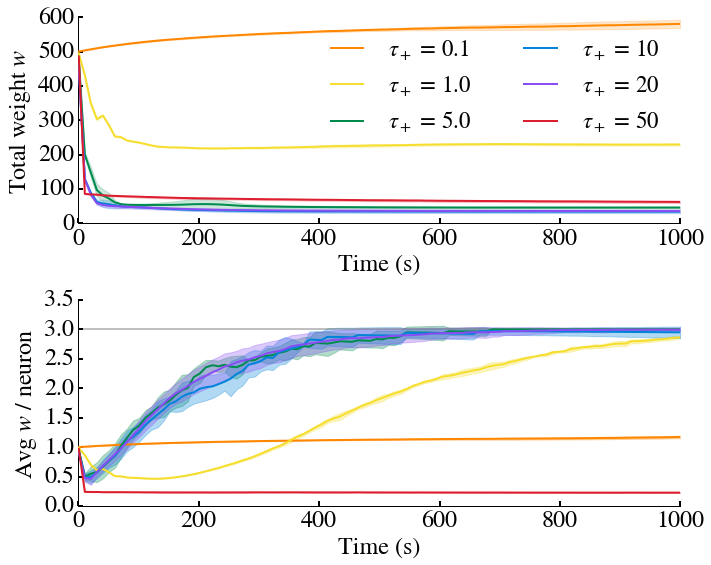

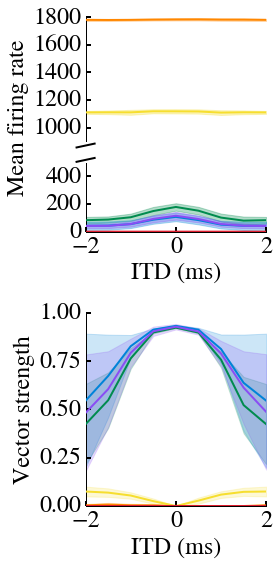

../MSOModelModule/fancyPlot.py:568: RuntimeWarning: invalid value encountered in divide
  mfr = mfr / np.max(mfr, axis=1)[:, np.newaxis]
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:94: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python2.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


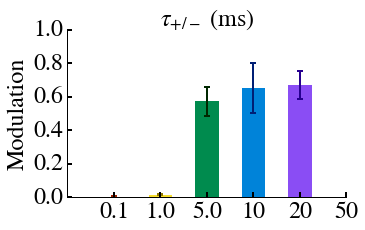

In [7]:
ts = np.linspace(200000, 200000000, 100)
paths = ['../../data/22-14-23', '../../data/22-14-08', '../../data/22-15-28', 
         '../../data/22-15-15', '../../data/21-52-52', '../../data/22-14-41']
labels = [r'$\tau_+$ = {}'.format(i) for i in [0.1, 1.0, 5.0, 10, 20, 50]]
colors = np.roll(['#008b4e', '#0083d9', '#8a4df4', '#DD1E2F', '#ff8700', '#f6de2f'], 2)      

plotWeightEvolvement(paths, labels, ts, colors)
plt.savefig('figures/chapter4/weight_evolvement_various_tau.pdf')
plt.show()

ylim  = [900.0, 1800.0]
ylim2 = [0.0, 500.0]
yticks = [1000, 1200, 1400, 1600, 1800]
yticks2 = [0, 200, 400]
labels = [0.1, 1.0, 5.0, 10, 20, 50]
plotITDCurves(paths, colors, True, False, (ylim, ylim2, yticks, yticks2))
plt.savefig('figures/chapter4/mfr_vs_various_tau.pdf')
plt.show()

labels = ['0.1', '1.0', '5.0', '10', '20', '50']
x = loadMeasurementsPerItd(paths, [0, 1, 2, 3, 4, 5, 6], [0, 0, 0, 0, 0, 0])
modpre_per_itd, vspre_per_itd, mod_per_itd, vs_per_itd, nr_per_itd, itdoptions = x
plotModulationWithoutBefore(mod_per_itd, labels, 'Modulation', colors)
plt.title(r'$\tau_{+/-}$ (ms)')
plt.savefig('figures/chapter4/modulation_various_tau.pdf')
plt.show()

## Figure 4.5

The neurons are sorted by their best ITD, which creates a diagonal structure. The mean firing rate is normalised by the maximum firing rate, making it range up to 1. Upper panel shows before and lower panel shows after monaural responsive neurons have been removed. 

Task / Batchsize 1000


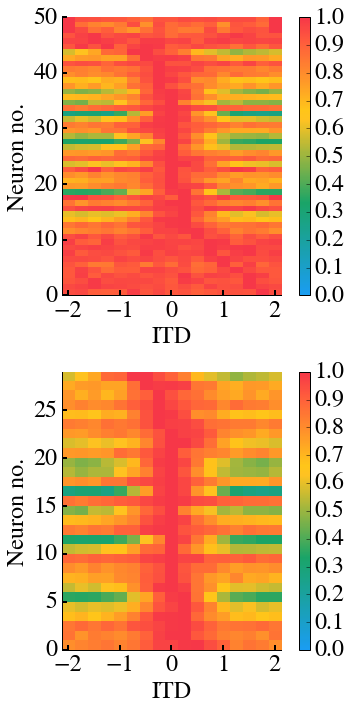

Task / Batchsize 100


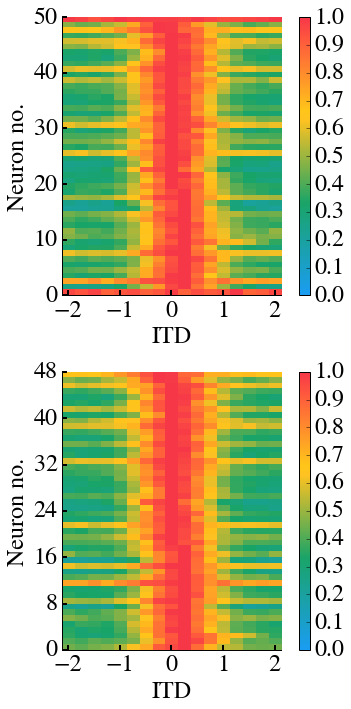

Random / Batchsize 1000


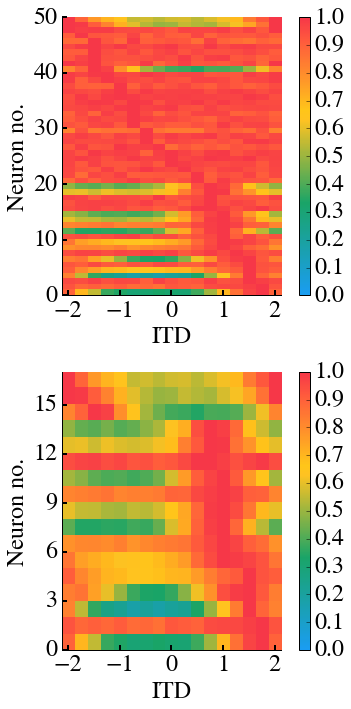

Random / Batchsize 100


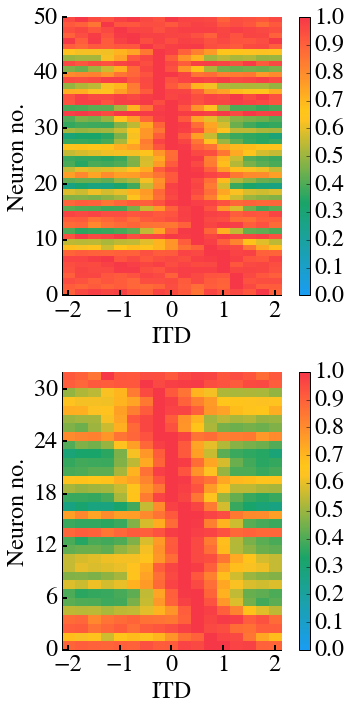

In [8]:
colors = ['#0083d9', '#008b4e', '#ffac00', '#DD1E2F']        
rvb = makeColorMap(colors)
paths = ['../../data/18-29-33', '../../data/18-31-51', 
         '../../data/18-30-34', '../../data/18-31-27']
test_nr = [0, 1, 0, 0, 0, 0, 0, 0, 0] #, 0]
itdoptions = np.linspace(-2.0, 2.0, 17)
labels = ['Task / Batchsize 1000', 'Task / Batchsize 100', 'Random / Batchsize 1000', 'Random / Batchsize 100']

for i, path in enumerate(paths):
    print labels[i]
    plotMeanFiringRateImshow(path, labels[i], rvb, test_nr[i])
    plt.savefig('figures/chapter4/imshowMFR_{}.pdf'.format(i))
    plt.show()

plt.show()

## Figure 4.6

The weight development, distribution and modulation over four different input types (random with batchsize 1000 ms or 100 ms and task with batchsize 1000ms or 100ms)

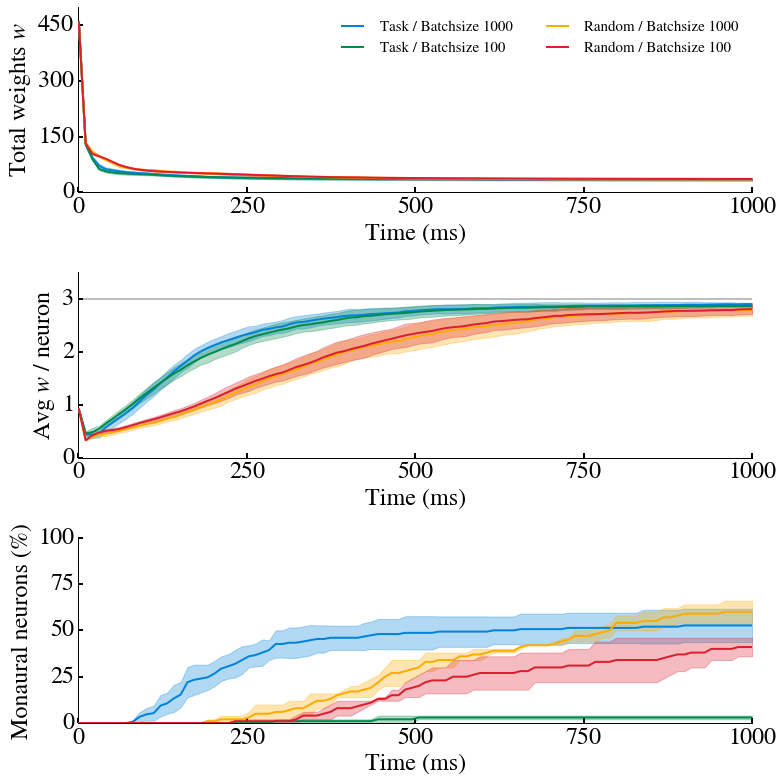

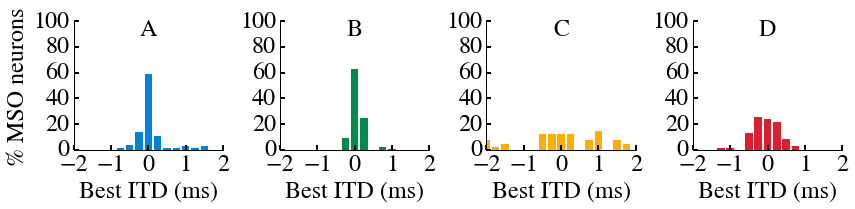

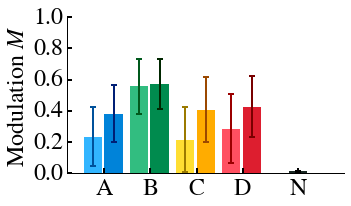

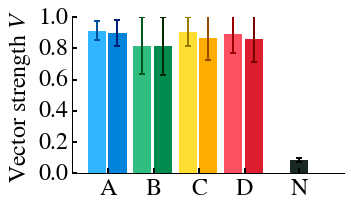

In [9]:
paths = [ '../../data/18-29-23', # '../2016-08-29/20-58-53',
         '../../data/18-29-33', '../../data/18-29-43', 
         '../../data/18-31-42', '../../data/18-31-51', 
         '../../data/18-30-34', '../../data/18-30-40',
         '../../data/18-31-19', '../../data/18-31-27',
         '../../data/14-55-17'] 


colors = ['#0083d9', '#008b4e', '#ffac00', '#DD1E2F', '#192823']
ids = [0, 0, 0, 1, 1, 2, 2, 3, 3, 4]
test_nr = [0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
nr_sim = [3, 2, 2, 2, 1]
modpre_per_itd, vspre_per_itd, mod_per_itd, vs_per_itd, nr_per_itd, itdoptions = loadMeasurementsPerItd(paths, ids, test_nr)
ts = np.linspace(200000, 200000000, 100)

labels = ['Task / Batchsize 1000', 'Task / Batchsize 100', 'Random / Batchsize 1000', 'Random / Batchsize 100', 'No learning']

plotWeightEvolvementsClasses(paths[:-1], colors, labels[:-1], ts, ids[:-1], nr_sim[:-1])
plt.tight_layout()
plt.savefig('figures/chapter4/weightevolvement_varying.pdf')
plt.show()

labels = ['A', 'B', 'C', 'D', 'N']

plotDistribution(labels, colors, nr_per_itd, itdoptions, zero=False)
plt.savefig('figures/chapter4//varying_BITDs.pdf')
plt.show()
   
plotModulationOrVectorstrength(mod_per_itd, modpre_per_itd, labels, 'Modulation $M$', colors)
plt.tight_layout()
plt.savefig('figures/chapter4/varying_modulation.pdf')

plotModulationOrVectorstrength(vs_per_itd, vspre_per_itd, labels, 'Vector strength $V$', colors)
plt.tight_layout()
plt.savefig('figures/chapter4/varying_vs.pdf')
plt.show()



## Figure 4.7

These are the results for the task related and random ITD sequences over a range [-0.5, 0.5] and various frequencies

Results for random ITD sequence


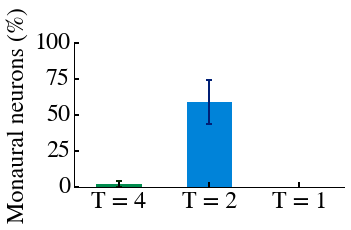

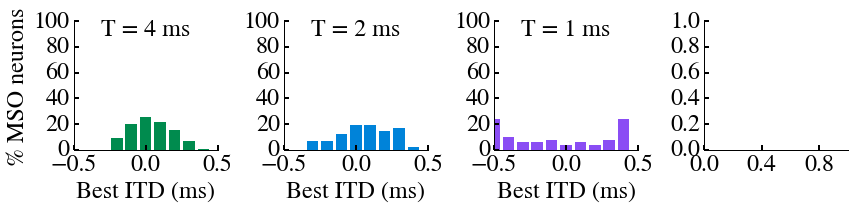

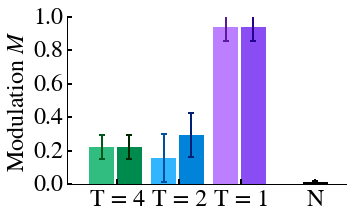

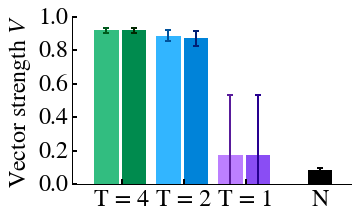

Results for task ITD sequence


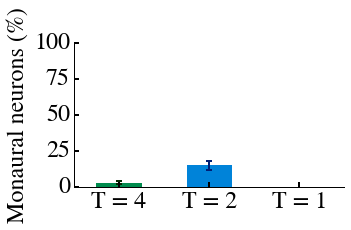

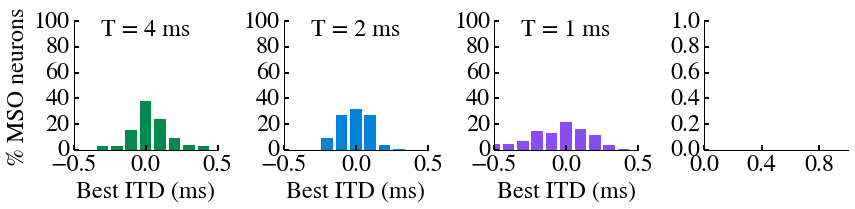

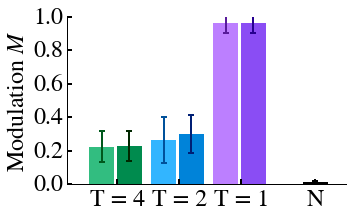

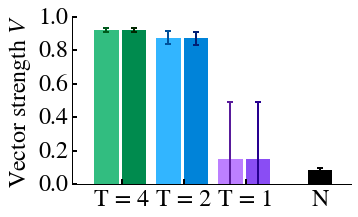

In [10]:
colors = ['#008b4e', '#0083d9', '#8a4df4', '#DD1E2F', '#ff8700', '#f6de2f']  

ts = np.linspace(200000, 200000000, 100)

paths = ['../../data/18-30-34', '../../data/18-30-40',  # 4.0 / Random / 1000
        '../../data/18-31-19', '../../data/18-31-27',   # 4.0 / Random / 100 
        '../../data/11-32-23', '../../data/17-23-05',   # 4.0 / Random (shorter) / 100
        '../../data/13-27-29', '../../data/13-27-35',   # 2.0 / Random (shorter) / 100
        '../../data/13-27-17',                               # 1.0 / Random / 100 
        '../../data/18-31-42', '../../data/18-31-51',   # 4.0 / Task ITD / 100
        '../../data/13-27-57', '../../data/13-28-06',   # 2.0 / Task / 100
        '../../data/11-32-51', '../../data/13-26-23',   # 1.0 / Task / 100
        '../../data/18-29-23',                               # 4.0 / Task ITD / 1000
        '../../data/18-29-33', '../../data/18-29-43', 
        '../../data/14-55-17', '../../data/14-55-17_2']     # No learning

ids = [0, 0, 1, 1, 2, 2, 3, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 8, 9, 10]
nr_sim = [2, 2, 2, 2, 1, 2, 2, 2, 3, 1, 1]

labels = ['Random / 4.0 / 1000 / [-2, 2]',
          'Random / 4.0 / 100 / [-2, 2]', 
          'Random / 4.0 / 100', 
          'Random / 2.0 / 100', 
          'Random / 1.0 / 100',
          'Task / 4.0 / 100',
          'Task / 2.0 / 100', 
          'Task / 1.0 / 100', 
          'Task / 4.0 / 1000',
          'No learning', 
          'No learning']

label_sims = [ ['T = 4 ms', "T = 2 ms", "T = 1 ms", "N"], ['T = 4 ms', "T = 2 ms", "T = 1 ms", "N"]]
label_sims_noms = [ ['T = 4', "T = 2", "T = 1", "N"], ['T = 4', "T = 2", "T = 1", "N"]]

title = ['random', 'task']

sims = [[2, 3, 4, 9], [5, 6, 7, 9]]
test_nrs = [0, 0]
#test_nrs = [[1, 1, 0, 0, 0, 0, 0], 0, 0, 0]

colors = ['#008b4e', '#0083d9', '#8a4df4', '#000000']  

for j, sim in enumerate(sims):
    
    print 'Results for {} ITD sequence'.format(title[j])

    bla = [i for i, idx in enumerate(ids) if idx in sim]  
    nr_sim_tmp = np.array(nr_sim)[sim]
    paths_tmp =  np.array(paths)[bla]
    #labels_tmp = np.array(labels)[sim]
    labels_tmp = label_sims[j]
    labels_tmp_noms = label_sims_noms[j]
    ids_tmp = [[i for _ in range(x)] for i, x in enumerate(nr_sim_tmp)]
    ids_tmp = [item for sublist in ids_tmp for item in sublist]
    
    if test_nrs[j] == 0:
        test_nr = [0]*len(paths_tmp) 
    else:
        test_nr = test_nrs[j]
    
    plotMonauralBarplot(paths_tmp, colors, labels_tmp_noms, 200000000, ids_tmp, nr_sim_tmp)
    plt.savefig('figures/chapter4/monauralBar_{}.pdf'.format(title[j]))

    x = loadMeasurementsPerItd(paths_tmp, ids_tmp, test_nr)
    modpre_per_itd, vspre_per_itd, mod_per_itd, vs_per_itd, nr_per_itd, itdoptions = x
    plotDistribution(labels_tmp, colors, nr_per_itd, itdoptions, width=0.08, zero=False)
    plt.savefig('figures/chapter4/distribution_freq_{}.pdf'.format(title[j]))

    plotModulationOrVectorstrength(mod_per_itd, modpre_per_itd, labels_tmp_noms, 'Modulation $M$', colors)
    plt.savefig('figures/chapter4/modulation_freq_{}.pdf'.format(title[j]))

    plotModulationOrVectorstrength(vs_per_itd, vspre_per_itd, labels_tmp_noms, 'Vector strength $V$', colors)
    plt.savefig('figures/chapter4/vectorstrength_freq_{}.pdf'.format(title[j]))
    
    plt.show()
